In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv("startup_funding.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [6]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [8]:
data.drop(432,inplace=True)

## cleaning

In [9]:
data["AmountInUSD"]=data["AmountInUSD"].str.replace(",","")
data["AmountInUSD"]=pd.to_numeric(data["AmountInUSD"])

In [10]:
data["AmountInUSD"].value_counts()
data["AmountInUSD"].fillna(data["AmountInUSD"].mode()[0],inplace=True)
mode=data["AmountInUSD"].mode()

In [11]:
date_mon=pd.to_numeric(data["Date"].str[3:5],errors="coerce")
date_year=pd.to_numeric(data["Date"].str[-4:])
date=date_year+date_mon*0.01

data["Date"]=date
data["Date_month"]=date_mon
data["Date_year"]=date_year

## Analysis 

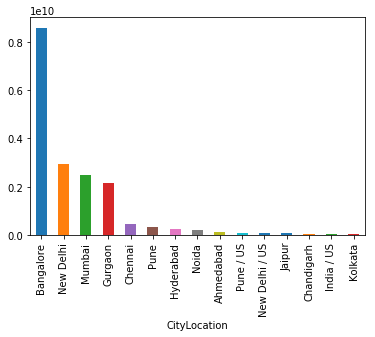

In [12]:
data.groupby("CityLocation")["AmountInUSD"].sum().sort_values(ascending=False).head(15).plot(kind="bar")

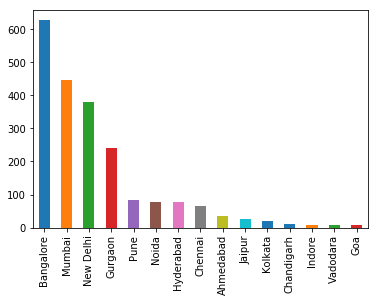

In [13]:
data["CityLocation"].value_counts().head(15).plot(kind="bar")

In [14]:
#df=data.groupby("CityLocation")["AmountInUSD"].sum().sort_values(ascending=False)/data.groupby("CityLocation")["AmountInUSD"].count().sort_values(ascending=False)
#df.sort_values(ascending=False).head(15).plot(kind="bar")

In [52]:
#sns.boxplot(x=data["AmountInUSD"],data=data)
data["AmountInUSD"].describe().astype(int)

count          2371
mean        8095059
std        51617711
min           16000
25%          700000
50%         1000000
75%         2500000
max      1400000000
Name: AmountInUSD, dtype: int32

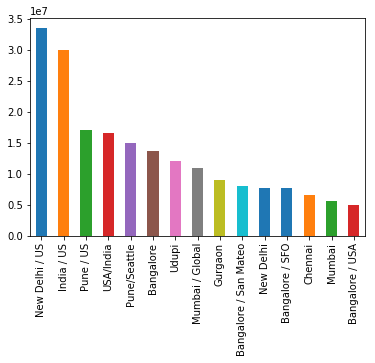

In [32]:
(data.groupby("CityLocation")["AmountInUSD"].sum()/data["CityLocation"].value_counts()).sort_values(ascending=False).head(15).plot(kind="bar")

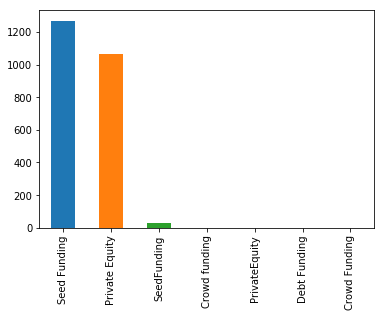

In [16]:
data["InvestmentType"].value_counts().plot(kind="bar")

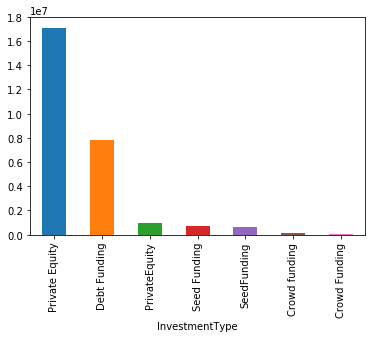

In [17]:
data.groupby("InvestmentType")["AmountInUSD"].mean().sort_values(ascending=False).head(15).plot(kind="bar")

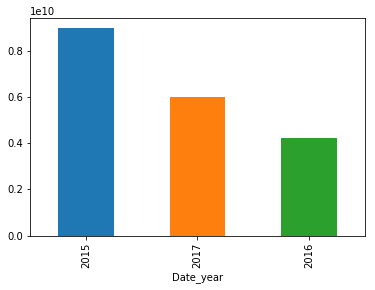

In [18]:
data.groupby("Date_year")["AmountInUSD"].sum().sort_values(ascending=False).head(15).plot(kind="bar")

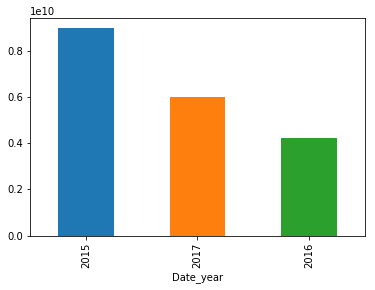

In [19]:
data.groupby("Date_year")["AmountInUSD"].sum().sort_values(ascending=False).head(15).plot(kind="bar")

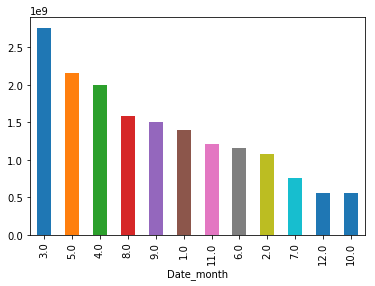

In [53]:
data.groupby("Date_month")["AmountInUSD"].sum().sort_values(ascending=False).head(12).plot(kind="bar")

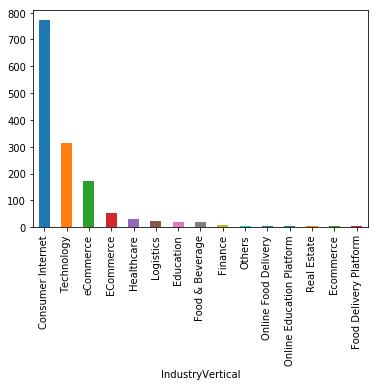

In [21]:
data.groupby("IndustryVertical")["AmountInUSD"].count().sort_values(ascending=False).head(15).plot(kind="bar")

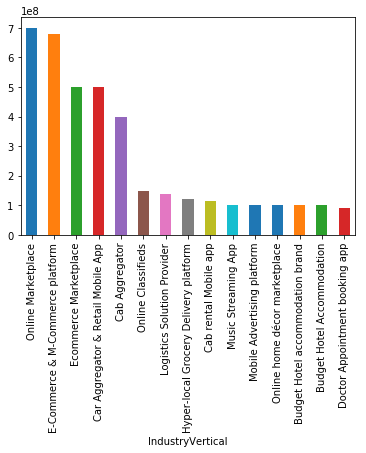

In [22]:
data.groupby("IndustryVertical")["AmountInUSD"].mean().sort_values(ascending=False).head(15).plot(kind="bar")

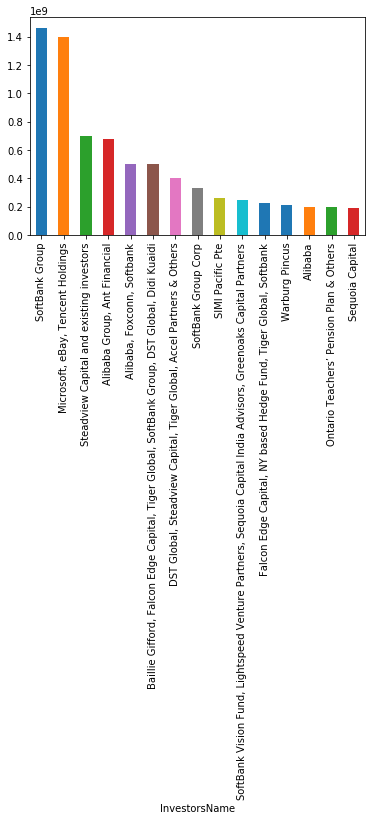

In [23]:
data.groupby("InvestorsName")["AmountInUSD"].sum().sort_values(ascending=False).head(15).plot(kind="bar")

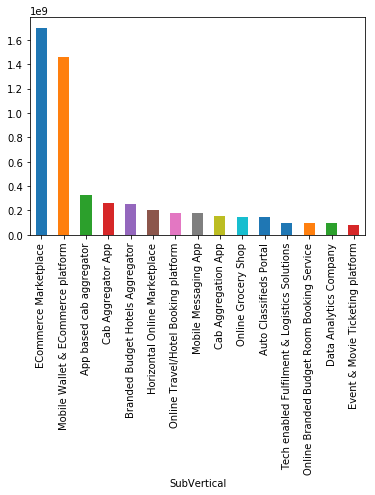

In [24]:
data.groupby("SubVertical")["AmountInUSD"].sum().sort_values(ascending=False).head(15).plot(kind="bar")

In [25]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_startups[df_startups['IndustryVertical'] == 'Ecommerce']['InvestorsName']))

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
pip install wordcloud
